# Training MNIST Dataset

By Darshan Shah

### Approach 

I have used tensorflow and keras (as backend) to create the Neural network and Used Tensorboard for Visualization and Analysis.  
The Following is the workflow I followed:  
**1. Load the Data**  
 The entire given dataset is extracted from npy files using the numpy load function. The training and test dataset are saved in their respective variables.
 
**2. Normalization**   
It was observed that the given dataset, pixel values ranges from 0-255. So as a preprocessing step the test and traininig data are both bought within a range of 0-1 for easier processing and efficient training.  

**3. Define the Model**  
For this network, I tried exploring various options such as Convolution layers, fully connected layers, and different activation functions.  
After some experimentation, I found I was able to achieve about 97% accuracy using dense layers. The convolution layers took longer to fit (obviously) and it was getting trickier to tune the hyperparamters. Hence decided to continue with dense layers.
I started out with using a Single Hidden Layer and achieved the accuracy of about 68% after 2 Epochs. Adding another layer boosted the accuracy to about 93% after 2 Epochs. I was able to boost this number by tweaking number of neurons.  
For the output layer,it consists of 10 neurons each fires up corresponding to the detected number being from 0 -10. The Softmax activation function is used so as to get a probablity distribution corresponding to each number.  

**4. Configure Model**   
We configure the model for training by defining the Optimizer, Loss calculation methodology and the metrics which we are looking to get from out model.  

**5. Fit Model**  
Finally, we train our model. We callback to a tensorboard method which logs data for plotting and visualization purposes.  

**6. Validation**  
The Valitation data is used to test how good the model has learnt from our training data. Based on how well the model performs with the validation data, we can analyse if the model is overfitting, underfitting, or just good.

### Analysis

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**Plots from Tensorboard**

Accuracy changes in terms of Batch and Epochs  

![Batch Accuracy](../../../Pictures/MNIST/Batch_acc.png)
![Batch Loss](../../../Pictures/MNIST/Batch_loss.png)
![Epoch Accuracy_Loss](../../../Pictures/MNIST/Epoch_acc_loss.png)
![Epoch_Validation_Accuracy](../../../Pictures/MNIST/Epoch_val_acc.png)

The faded blue linnes indicates the results of previous iterations during experimentation.

**Distribution of Biases Across Layers:**

The following plots show the distribution of biases across different layers. It is evident from these plots that the biases are non-zero for these layers.
![Bias_Distribution](../../../Pictures/MNIST/Bias_dist.png)

**Bias Historgrams**
![Bias_Histogram](../../../Pictures/MNIST/Bias_hist.png)


## Code

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
%matplotlib inline

In [4]:
# (x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = np.load('trainImages.npy')
y_train = np.load('trainLabels.npy')
x_test = np.load('testImages.npy')
y_test = np.load('testLabels.npy')

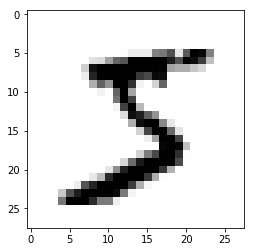

[0 0 0 0 0 1 0 0 0 0]


In [5]:
plt.imshow(x_train[0,0], cmap=plt.cm.binary)
plt.show()
print(y_train[0])

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  


In [10]:
model.compile(optimizer='adam',  
              loss='categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [13]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()),histogram_freq=1, write_graph=True, write_images=True)
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data = (x_test, y_test), callbacks=[tensorboard])   # train the model


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.2462 - acc: 0.9253 - val_loss: 0.1369 - val_acc: 0.9569
Epoch 2/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.1154 - acc: 0.9641 - val_loss: 0.1480 - val_acc: 0.9531
Epoch 3/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0836 - acc: 0.9734 - val_loss: 0.1012 - val_acc: 0.9672
Epoch 4/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.0648 - acc: 0.9785 - val_loss: 0.1337 - val_acc: 0.9589
Epoch 5/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.0525 - acc: 0.9831 - val_loss: 0.1148 - val_acc: 0.9668


In [14]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model

10000/10000 [==============================] - 0s 23us/step


In [15]:
print("Loss for Test Data = " + str(val_loss))  # model's loss (error)
print("Accuracy for Test Data = " + str(val_acc))  # model's accuracy

Loss for Test Data = 0.1147776050185319
Accuracy for Test Data = 0.9668


**Additional Plots**

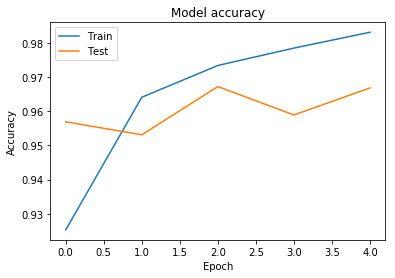

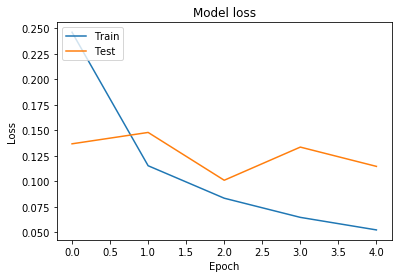

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


*Note:*
I run    
```bash
tensorboard --logdir=/home/darshan/CMSC828L/Problem\ Set\ 2/MNIST/logs  
```
in a new terminal to get tensorboard plots. Modify the directory address accordingly in your system
